<a href="https://colab.research.google.com/github/paologastaldi-polito/siren/blob/master/structured_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment initialization

In [ ]:
!pip3 install 'torch==1.3.1'
!pip3 install 'torchvision==0.5.0'
!pip3 install 'Pillow-SIMD'
!pip3 install 'tqdm'
!pip3 install 'tensorflow'

# Project initialization

#####**Install SIREN requirements**

In [1]:
!pip3 install 'sk-video'
!pip3 install 'cmapy'

#####**Import SIREN libraries**

In [4]:
import sys

!rm -rf MLAI_project_refactored
!git clone https://github.com/Stevezbiz/MLAI_project_refactored.git
sys.path.append('MLAI_project_refactored')

import myutils, mydataloader, siren, relu
from mydataloader import PoissonEqn
from siren import Siren
from relu import Relu
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

Cloning into 'MLAI_project_refactored'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 65 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


#1 - implement the network

#2 - Image fitting and Poisson image reconstruction

###2.1 - Image fitting

#####2.1.1 - Prepare data

In [3]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

#####2.1.2 - Prepare training

In [4]:
# Create the network
net = Siren(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

#####2.1.3 - Train the network

In [ ]:
total_steps = 500
steps_til_summary = 50
verbose = False

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.image_mse(model_output, coords, gt['img'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

###2.2 - Poisson image reconstruction

#####2.2.1 - Prepare data

In [ ]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

#####2.2.2 - Train on gradient

In [ ]:
# Create the network
net = Siren(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = False

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.gradients_mse(model_output, coords, gt['grads'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

#####2.2.3 - Train on laplacian

In [ ]:
# Create the network
net = Siren(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = False

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.laplace_mse(model_output, coords, gt['laplace'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

#3 - Compare with ReLU

###3.1 - Prepare data

In [6]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

###3.2 - Train on image

In [ ]:
# Create the network
net = Relu(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = True

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.image_mse(model_output, coords, gt['img'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

###3.3 - Train on gradient

In [ ]:
# Create the network
net = Relu(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = True

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.gradients_mse(model_output, coords, gt['grads'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

###3.4 - Train on laplacian

In [ ]:
# Create the network
net = Relu(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results
model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = True

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.laplace_mse(model_output, coords, gt['laplace'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

#4 - Ablation studies

###4.1 - change weights of the first layer

#####4.1.1 - Prepare data

In [10]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

#####4.1.2 - Train the network

Step 0, Total loss 0.229435
Step 50, Total loss 0.004963
Step 100, Total loss 0.001709
Step 150, Total loss 0.000940
Step 200, Total loss 0.000608
Step 250, Total loss 0.000437
Step 300, Total loss 0.000337
Step 350, Total loss 0.000261
Step 400, Total loss 0.000212
Step 450, Total loss 0.000469
Step 500, Total loss 0.000155


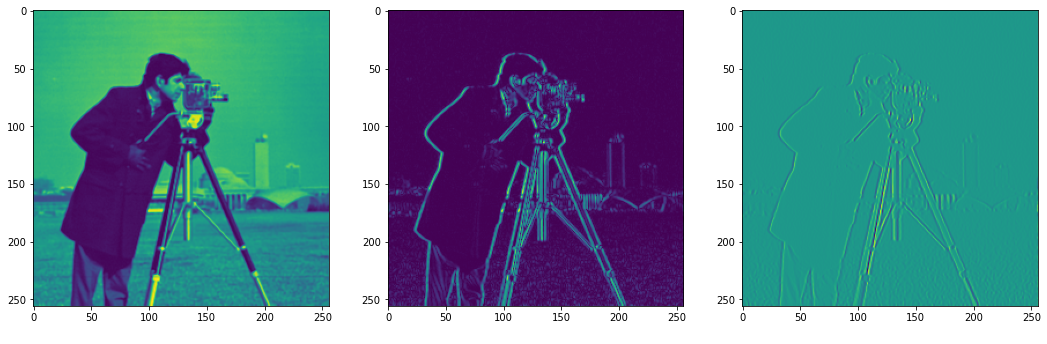

Ground truth


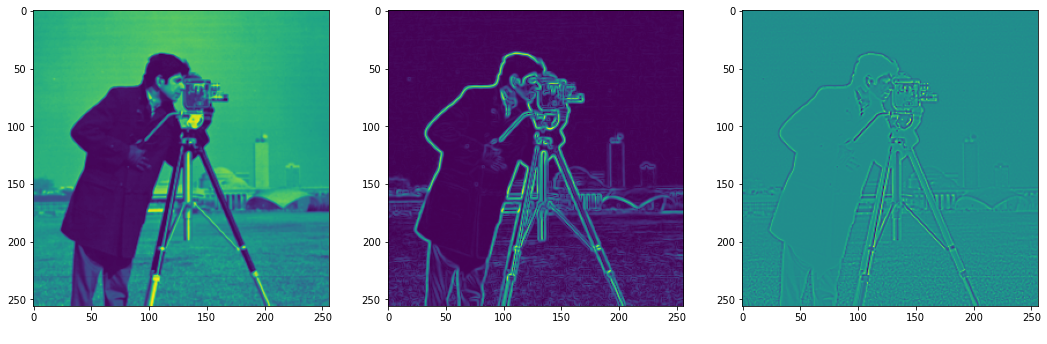

In [12]:
# Create the network
net = Siren(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results

# Change weights of first layer
torch.nn.init.kaiming_normal_(net.net[0].linear.weight, a=0.0, nonlinearity='relu', mode='fan_in')

model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = False

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.image_mse(model_output, coords, gt['img'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

###4.2 - change weights of the hidden layers

#####4.2.1 - Prepare data

In [13]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

#####4.2.2 - Train the network

Step 0, Total loss 0.239473
Step 50, Total loss 0.237457
Step 100, Total loss 0.236560
Step 150, Total loss 0.235749
Step 200, Total loss 0.235021
Step 250, Total loss 0.234347
Step 300, Total loss 0.233756
Step 350, Total loss 0.233163
Step 400, Total loss 0.232660
Step 450, Total loss 0.232191
Step 500, Total loss 0.231787


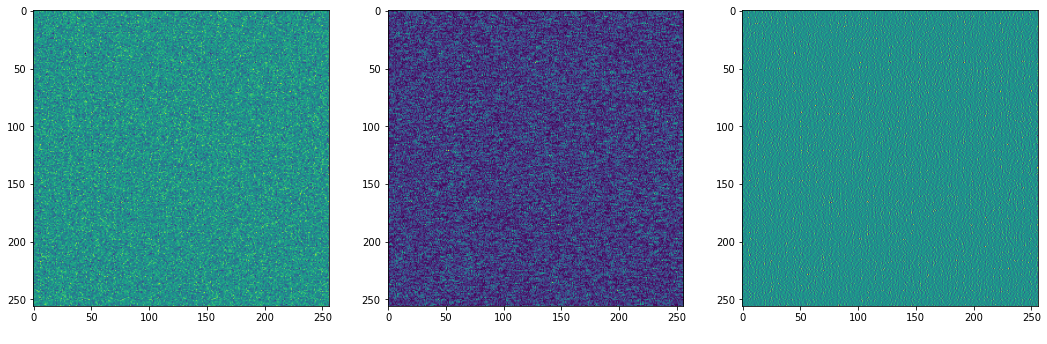

Ground truth


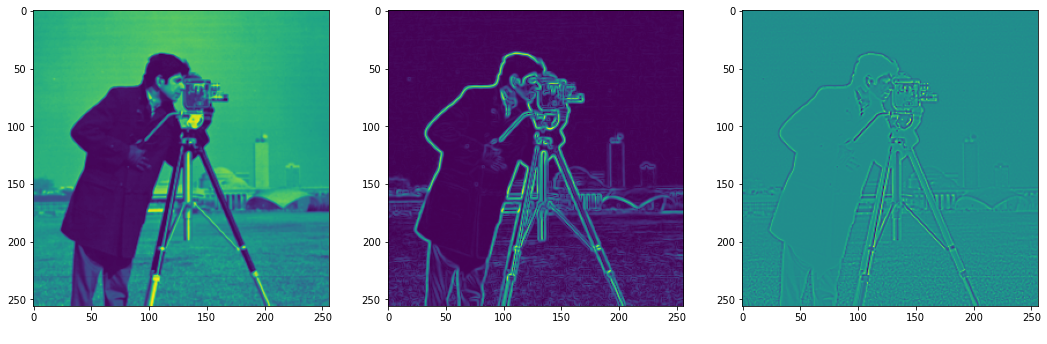

In [16]:
# Create the network
net = Siren(n_hidden_layers=3, hidden_features=256) # IMPORTANT: 3 layers to compare with SIREN paper results

# Change weights of first layer
torch.nn.init.kaiming_normal_(net.net[1].linear.weight, a=0.0, nonlinearity='relu', mode='fan_in')
torch.nn.init.kaiming_normal_(net.net[2].linear.weight, a=0.0, nonlinearity='relu', mode='fan_in')
torch.nn.init.kaiming_normal_(net.net[3].linear.weight, a=0.0, nonlinearity='relu', mode='fan_in')

model = net.cuda()

# Define optimizer
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

total_steps = 500
steps_til_summary = 50
verbose = False

for step in range(total_steps+1):
    model_output, coords = model(model_input)    
    loss = myutils.image_mse(model_output, coords, gt['img'])
    
    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        if verbose or step == total_steps:
            img = model_output.clone()
            img_grads = myutils.sobel_filter(model_output.clone())
            img_laplacian = myutils.laplace_filter(model_output.clone())

            img_dict = {
                'img' : img,
                'grads' : img_grads,
                'laplace' : img_laplacian
            }
            myutils.plot_all(img_dict, gt)

    optim.zero_grad()
    loss.backward()
    optim.step()

print('Ground truth')
myutils.plot_all(gt, gt)

###4.3 - change ω0 parameter

#####4.3.1 - Prepare data

In [5]:
dataset = PoissonEqn(256, gradients=True, laplace=True)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, num_workers=0)

model_input, gt = next(iter(dataloader))
gt = {key: value.cuda() for key, value in gt.items()}
model_input = model_input.cuda()

#####4.3.2 - change ω0 in first layer

In [ ]:
psnr_data = {}
first_omega_0 = [8, 15, 30, 60, 120, 240]

for w0 in first_omega_0:
    print("w0:", w0)
    # Create the network
    net = Siren(n_hidden_layers=3, hidden_features=256, first_omega_0=w0, hidden_omega_0=30)
    model = net.cuda()

    # Define optimizer
    optim = torch.optim.Adam(lr=1e-4, params=model.parameters())
    total_steps = 500
    steps_til_summary = 50

    psnrs = []

    for step in range(total_steps+1):
        model_output, coords = model(model_input)    
        loss = myutils.image_mse(model_output, coords, gt['img'])
        psnr = myutils.psnr(model_output, gt['img'])
        psnrs.append(psnr)
        if not step % steps_til_summary:
            print("Step %d, Total loss %0.6f" % (step, loss))

        optim.zero_grad()
        loss.backward()
        optim.step()

    psnr_data[str(w0)] = psnrs

myutils.plot_psnrs(psnr_data, total_steps, 'w0 in first layer')

#####4.3.3 - change ω0 in hidden layers

In [ ]:
psnr_data = {}
hidden_omega_0 = [8, 15, 30, 60, 120, 240]

for w0 in hidden_omega_0:
    print("w0:", w0)
    # Create the network
    net = Siren(n_hidden_layers=3, hidden_features=256, first_omega_0=30, hidden_omega_0=w0)
    model = net.cuda()

    # Define optimizer
    optim = torch.optim.Adam(lr=1e-4, params=model.parameters())
    total_steps = 500
    steps_til_summary = 50

    psnrs = []

    for step in range(total_steps+1):
        model_output, coords = model(model_input)    
        loss = myutils.image_mse(model_output, coords, gt['img'])
        psnr = myutils.psnr(model_output, gt['img'])
        psnrs.append(psnr)
        if not step % steps_til_summary:
            print("Step %d, Total loss %0.6f" % (step, loss))

        optim.zero_grad()
        loss.backward()
        optim.step()

    psnr_data[str(w0)] = psnrs

myutils.plot_psnrs(psnr_data, total_steps, 'w0 in hidden layers')

#####4.3.4 - change ω0 in all the layers

In [ ]:
psnr_data = {}
omega_0 = [8, 15, 30, 60, 120, 240]

for w0 in omega_0:
    print("w0:", w0)
    # Create the network
    net = Siren(n_hidden_layers=3, hidden_features=256, first_omega_0=w0, hidden_omega_0=w0)
    model = net.cuda()

    # Define optimizer
    optim = torch.optim.Adam(lr=1e-4, params=model.parameters())
    total_steps = 500
    steps_til_summary = 50

    psnrs = []

    for step in range(total_steps+1):
        model_output, coords = model(model_input)    
        loss = myutils.image_mse(model_output, coords, gt['img'])
        psnr = myutils.psnr(model_output, gt['img'])
        psnrs.append(psnr)
        if not step % steps_til_summary:
            print("Step %d, Total loss %0.6f" % (step, loss))

        optim.zero_grad()
        loss.backward()
        optim.step()

    psnr_data[str(w0)] = psnrs

myutils.plot_psnrs(psnr_data, total_steps, 'w0 in all the layers')